# Import dependencies

In [9]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from tqdm import tqdm

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

from collections import Counter

# Load Data

In [2]:
data_embed = pd.read_csv("./term_embeddings/vectorized_term_embeddings_4k.csv")
data_embed.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.235717,-0.034357,0.059340,0.297741,0.413503,-0.005965,0.053272,-0.109700,0.191787,0.184964,...,0.222023,-0.038877,-0.471914,0.768315,-0.488685,0.120664,0.782061,-0.179443,-0.428450,0.461683
1,-0.178516,0.002904,0.131155,0.332376,0.247463,0.099109,-0.000515,0.026755,0.152213,0.175770,...,0.283444,-0.155591,-0.345533,0.806833,-0.311759,0.207827,0.600389,-0.149813,-0.418629,0.541288
2,-0.330687,-0.031855,0.105278,0.078271,0.195134,-0.136877,0.117263,-0.054845,0.206244,0.265202,...,0.215846,-0.030670,-0.520877,0.729626,-0.386960,0.177576,0.676565,-0.328219,-0.565267,0.506224
3,-0.281114,-0.042354,0.105358,0.152034,0.230870,-0.142952,0.144465,-0.065642,0.168137,0.245674,...,0.188485,-0.022974,-0.496699,0.746730,-0.406173,0.157490,0.685346,-0.276632,-0.548756,0.495335
4,-0.304600,-0.016233,0.152511,0.173860,0.161872,-0.073577,0.122591,-0.008369,0.165817,0.273474,...,0.204433,-0.045393,-0.448815,0.680492,-0.389678,0.141336,0.665190,-0.325107,-0.504376,0.517802


In [3]:
all_data = pd.read_csv(
    "../tests_17_ann_and_terms/article_v2_2_term_var_to_best_strategy/prepare_data/data_steps/steps_vars_term_str.csv",
    delimiter=',')

# leave only unique terms
print(f"Count all terms: {len(all_data)}")

print(f"max RI steps count: {max(all_data['RI_steps_num'])}")
print(f"max LO steps count: {max(all_data['LO_steps_num'])}")

# RI == LO -> 0
# RI > LO -> 1
# RI < LO -> 2
class_RI_LO = ["RI = LO" if los == ris else "RI < LO" if ris < los else "LO < RI" for los, ris in
               zip(all_data["LO_steps_num"].tolist(), all_data["RI_steps_num"].tolist())]

print(f"Count terms data samples: {len(class_RI_LO)}")

Count all terms: 4282
max RI steps count: 1000
max LO steps count: 219
Count terms data samples: 4282


# Some additional functions

In [4]:
pca = PCA(n_components=2)  # Set the number of components as needed
principal_components = pca.fit_transform(data_embed)

tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(data_embed)


def visualize_clusters(model_, clustering_method):
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['class'] = model_.labels_

    # Plot the PCA results with colorization based on the 'class' column
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df, palette="deep")
    plt.title(f'PCA results of {clustering_method}')
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')
    plt.legend()
    plt.show()

    tsne_df = pd.DataFrame(data=embedded_data, columns=['Dim 1', 'Dim 2'])
    tsne_df['class'] = model_.labels_

    # Plot the PCA results with colorization based on the 'class' column
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Dim 1', y='Dim 2', hue='class', data=tsne_df, palette="deep")
    plt.title(f't-SNE results of {clustering_method}')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.legend()
    plt.show()

In [5]:
pca_3d = PCA(n_components=3)  # Set the number of components as needed
principal_components_3d = pca_3d.fit_transform(data_embed)

tsne_3d = TSNE(n_components=3, random_state=42)
embedded_data_3d = tsne_3d.fit_transform(data_embed)


def visualize_clusters_3d_pca(model_, clustering_method):
    pca_df_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])
    pca_df_3d['class'] = [f"{x_}" for x_ in list(model_.labels_)]

    fig = px.scatter_3d(
        pca_df_3d, x='PC1', y='PC2', z='PC3',
        color='class', title=f"PCA 3D, {clustering_method}",
    )

    fig.update_traces(marker=dict(size=2))
    fig.show()


def visualize_clusters_3d_tsne(model_, clustering_method):
    tsne_df_3d = pd.DataFrame(data=embedded_data_3d, columns=["Dim 1", "Dim 2", "Dim 3"])
    tsne_df_3d['class'] = [f"{x_}" for x_ in list(model_.labels_)]

    fig = px.scatter_3d(
        tsne_df_3d, x='Dim 1', y='Dim 2', z='Dim 3',
        color='class', title=f"t-SNE 3D, {clustering_method}",
    )

    fig.update_traces(marker=dict(size=2))
    fig.show()

In [6]:
def draw_metrics(num_clusters, metric_cluster_vals, xlabel="Num clusters", ylabel="Metric", title="Clustering Method"):
    plt.plot(num_clusters, metric_cluster_vals)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} for {title}")

    plt.show()

In [23]:
def draw_metrics_many_norm(num_clusters, metric_cluster_vals_dict: dict, xlabel="Num clusters", ylabel="cl_metric",
                           title="Clustering Method", normalize=True):
    for name_, metric_cluster_vals in metric_cluster_vals_dict.items():
        if normalize:
            metric_cluster_vals = np.array(metric_cluster_vals) / np.max(metric_cluster_vals)
        plt.plot(num_clusters, metric_cluster_vals, label=name_)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.legend(loc="upper right")
    plt.show()

In [7]:
def wcss_metric(x_data, labels_):
    pd_x_data = x_data.copy(deep=True)
    pd_x_data["class"] = list(labels_)

    wcss = 0.0
    for cl_no in set(list(labels_)):
        cl_x_data = pd_x_data[pd_x_data["class"] == cl_no].drop(["class"], axis=1).reset_index(drop=True)
        cl_center = cl_x_data.mean(axis=0)
        css = 0.0
        for _, cl_x in cl_x_data.iterrows():
            cl_x = np.array(cl_x)
            css += np.sum(np.power(cl_x - cl_center, 2))
        wcss += css

    return wcss

In [8]:
def show_clustering_metrics(x_data, model_):
    print(f"Silhouette Score (MORE): {silhouette_score(x_data, model_.labels_)}")
    print(f"Davies-Bouldin Index (LESS): {davies_bouldin_score(x_data, model_.labels_)}")
    print(f"Calinski-Harabasz Index (MORE): {calinski_harabasz_score(x_data, model_.labels_)}")
    print(f"WCSS (LESS): {wcss_metric(x_data, model_.labels_)}")


In [71]:
def calculate_clustering_accuracy(labels_true, labels_pred):
    unique_clusters = np.unique(labels_pred)
    accuracy = 0.0

    for cluster in unique_clusters:
        cluster_indices = np.where(labels_pred == cluster)[0]
        true_labels_in_cluster = labels_true[cluster_indices]

        if len(true_labels_in_cluster) > 0:
            majority_class = Counter(true_labels_in_cluster).most_common(1)[0][0]
            correct_predictions = np.sum(true_labels_in_cluster == majority_class)
            accuracy += correct_predictions / len(true_labels_in_cluster)
    if len(unique_clusters) > 0:
        accuracy /= len(unique_clusters)

    return accuracy

In [88]:
def calculate_clustering_accuracy_per_class(labels_true, labels_pred):
    unique_clusters = np.unique(labels_pred)
    unique_classes = np.unique(labels_true)
    class_accuracies = {key_: 0.0 for key_ in unique_classes}
    
    for u_class in unique_classes:
        accuracy = 0.0
    
        for cluster in unique_clusters:
            cluster_indices = np.where(labels_pred == cluster)[0]
            true_labels_in_cluster = labels_true[cluster_indices]
    
            if len(true_labels_in_cluster) > 0:
                majority_class = Counter(true_labels_in_cluster).most_common(1)[0][0]
                if majority_class == u_class:
                    correct_predictions = np.sum(true_labels_in_cluster == majority_class)
                    accuracy += correct_predictions
        
        class_accuracies[u_class] = accuracy / len(labels_true[np.where(labels_true == u_class)])

    return class_accuracies

# k-means Clustering

In [11]:
# Use elbow method to define optimal clusters count
K_nums = range(2, 30)
fits = []
silhouette_scores = []
davies_bouldin_indexes = []
calinski_harabasz_indexes = []
wcss_metrics = []

for k in tqdm(K_nums):
    model = KMeans(n_clusters=k, random_state=0, n_init=100).fit(data_embed)
    fits.append(model)

    silhouette_scores.append(silhouette_score(data_embed, model.labels_, metric='euclidean'))
    davies_bouldin_indexes.append(davies_bouldin_score(data_embed, model.labels_))
    calinski_harabasz_indexes.append(calinski_harabasz_score(data_embed, model.labels_))
    wcss_metrics.append(wcss_metric(data_embed, model.labels_))

100%|██████████| 28/28 [08:04<00:00, 17.30s/it]


In [13]:
accuracies = [calculate_clustering_accuracy(np.array(class_RI_LO), cl_md.labels_) for cl_md in fits]

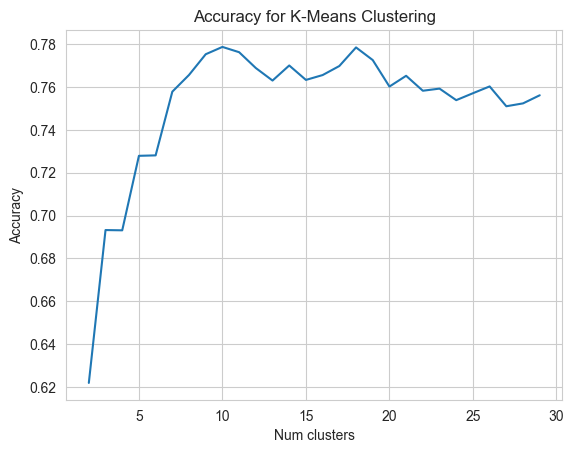

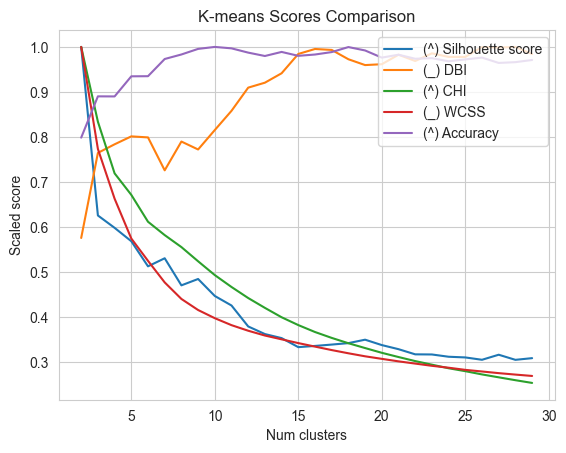

In [21]:
draw_metrics(K_nums, accuracies, title="K-Means Clustering", ylabel="Accuracy")

draw_metrics_many_norm(
    K_nums,
    {
        "(^) Silhouette score": silhouette_scores,
        "(_) DBI": davies_bouldin_indexes,
        "(^) CHI": calinski_harabasz_indexes,
        "(_) WCSS": wcss_metrics,
        "(^) Accuracy": accuracies,
    },
    xlabel="Num clusters",
    ylabel="Scaled score",
    title="K-means Scores Comparison",
)

## K-means, 10

In [18]:
model = KMeans(n_clusters=10, random_state=0, n_init=100).fit(data_embed)
show_clustering_metrics(data_embed, model)
print(f"Clustering accuracy is {calculate_clustering_accuracy(np.array(class_RI_LO), model.labels_)}")

Silhouette Score (MORE): 0.20697717120121334
Davies-Bouldin Index (LESS): 1.309739409187777
Calinski-Harabasz Index (MORE): 1645.003932965826
WCSS (LESS): 10412.53002368088
Clustering accuracy is 0.7786090611764884


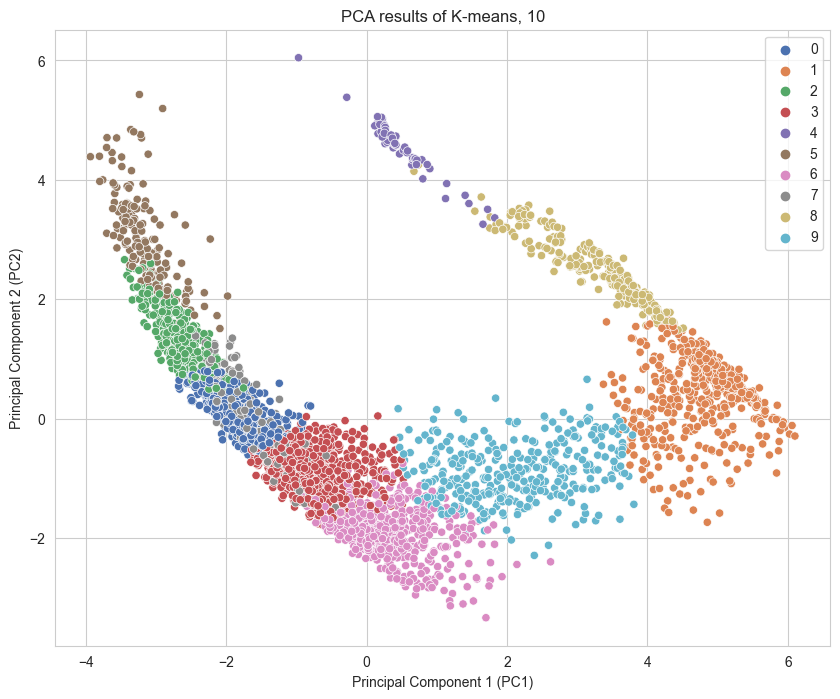

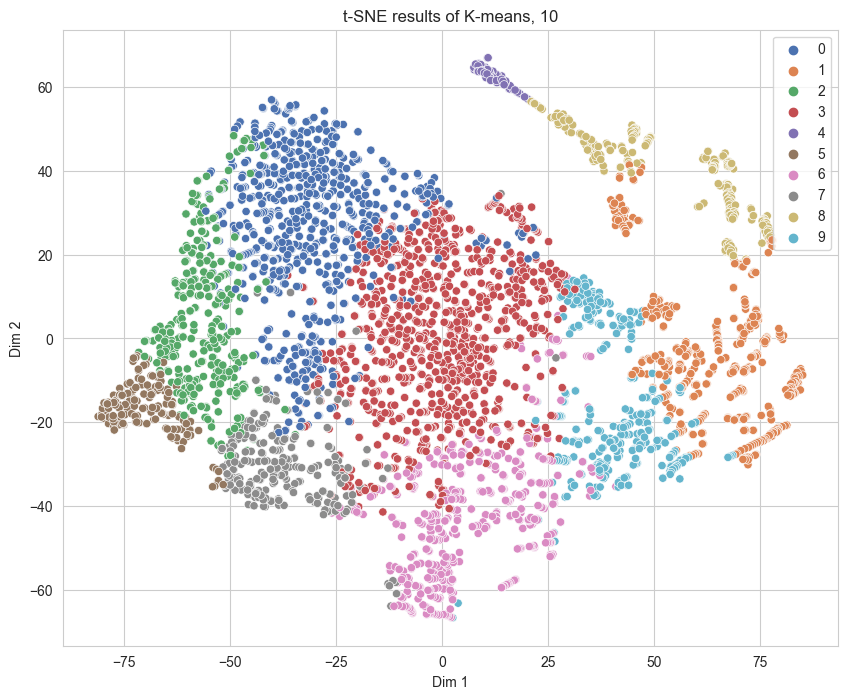

In [19]:
visualize_clusters(model, "K-means, 10")

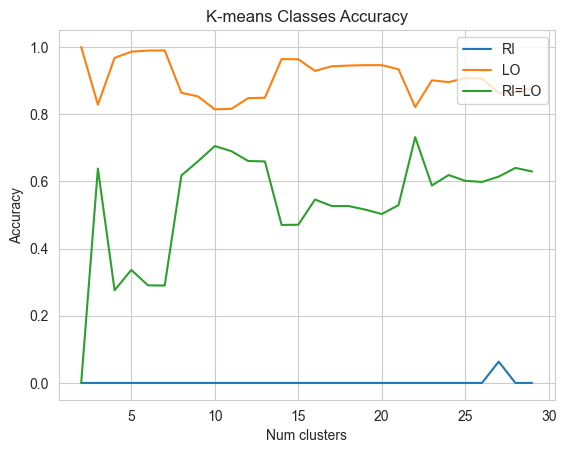

In [89]:
# RI == LO -> 0
# RI > LO -> 1
# RI < LO -> 2

class_acc = {"RI": [], "LO": [], "RI=LO": []}
for cl_md in fits:
    ca = calculate_clustering_accuracy_per_class(np.array(class_RI_LO), cl_md.labels_)
    class_acc["RI"].append(ca["RI < LO"])
    class_acc["LO"].append(ca["LO < RI"])
    class_acc["RI=LO"].append(ca["RI = LO"])

draw_metrics_many_norm(
    K_nums,
    {
        "RI": class_acc["RI"],
        "LO": class_acc["LO"],
        "RI=LO": class_acc["RI=LO"],
    },
    xlabel="Num clusters",
    ylabel="Accuracy",
    title="K-means Classes Accuracy",
    normalize=False,
)

# DBSCAN, Euclidean

In [90]:
cl_metric = "euclidean"
min_samples = 10

dbscan_fits = []
dbscan_num_clusters = []
dbscan_num_noises = []
epsilons = np.arange(0.01, 2.01, 0.01)

for epsilon in tqdm(epsilons):
    dbscan_model = DBSCAN(eps=epsilon, min_samples=min_samples, metric=cl_metric).fit(data_embed)
    dbscan_fits.append(dbscan_model)

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(dbscan_model.labels_)) - (1 if -1 in dbscan_model.labels_ else 0)
    n_noise_ = list(dbscan_model.labels_).count(-1)

    dbscan_num_clusters.append(n_clusters_)
    dbscan_num_noises.append(n_noise_)

100%|██████████| 200/200 [00:54<00:00,  3.67it/s]


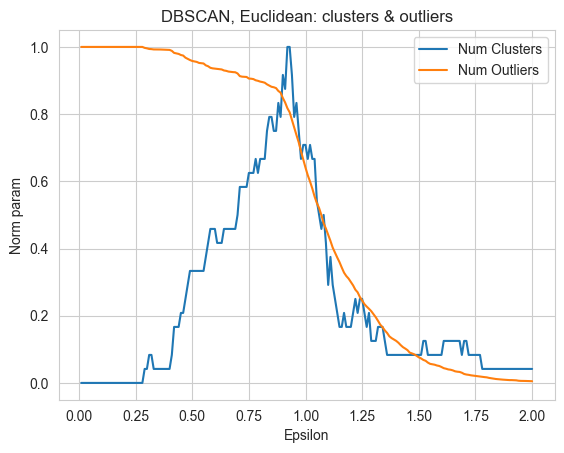

In [91]:
draw_metrics_many_norm(
    epsilons,
    {
        "Num Clusters": dbscan_num_clusters,
        "Num Outliers": dbscan_num_noises,
    },
    xlabel="Epsilon",
    ylabel="Norm param",
    title="DBSCAN, Euclidean: clusters & outliers",
    normalize=True,
)

In [92]:
silhouette_scores = [silhouette_score(data_embed, dbscan_model_.labels_)
                     if len(set(dbscan_model_.labels_)) > 1 else 0 for dbscan_model_ in dbscan_fits]
davies_bouldin_indexes = [davies_bouldin_score(data_embed, dbscan_model_.labels_)
                          if len(set(dbscan_model_.labels_)) > 1 else 0 for dbscan_model_ in dbscan_fits]
calinski_harabasz_indexes = [calinski_harabasz_score(data_embed, dbscan_model_.labels_)
                             if len(set(dbscan_model_.labels_)) > 1 else 0 for dbscan_model_ in dbscan_fits]
wcss_metrics = [wcss_metric(data_embed, dbscan_model_.labels_)
                for dbscan_model_ in dbscan_fits]
accuracies = [calculate_clustering_accuracy(np.array(class_RI_LO), cl_md.labels_) for cl_md in dbscan_fits]

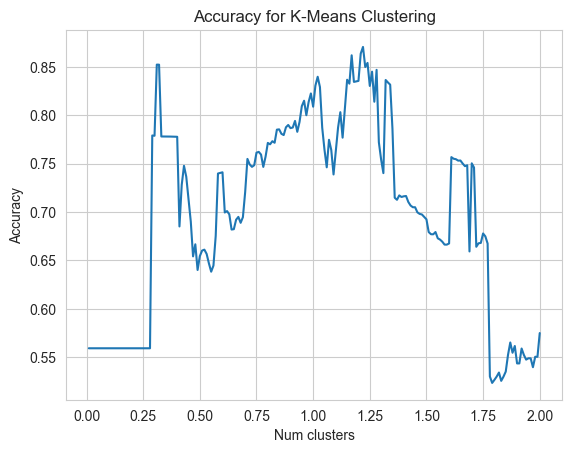

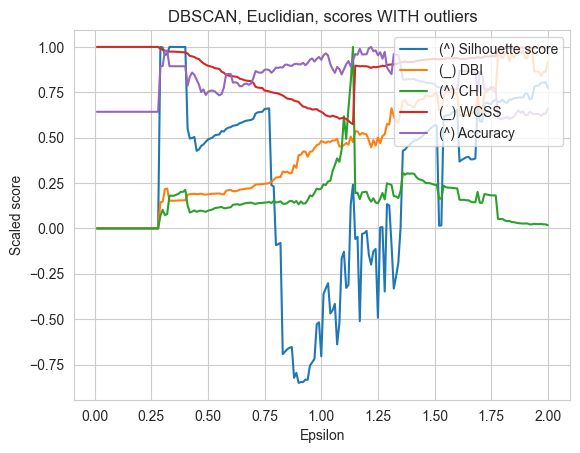

In [93]:
draw_metrics(epsilons, accuracies, title="K-Means Clustering", ylabel="Accuracy")

draw_metrics_many_norm(
    epsilons,
    {
        "(^) Silhouette score": silhouette_scores,
        "(_) DBI": davies_bouldin_indexes,
        "(^) CHI": calinski_harabasz_indexes,
        "(_) WCSS": wcss_metrics,
        "(^) Accuracy": accuracies,
    },
    xlabel="Epsilon",
    ylabel="Scaled score",
    title="DBSCAN, Euclidian, scores WITH outliers",
)

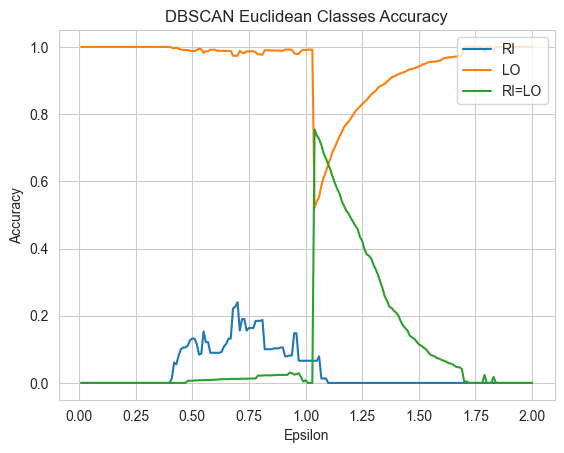

In [96]:
class_acc = {"RI": [], "LO": [], "RI=LO": []}
for cl_md in dbscan_fits:
    ca = calculate_clustering_accuracy_per_class(np.array(class_RI_LO), cl_md.labels_)
    class_acc["RI"].append(ca["RI < LO"])
    class_acc["LO"].append(ca["LO < RI"])
    class_acc["RI=LO"].append(ca["RI = LO"])

draw_metrics_many_norm(
    epsilons,
    {
        "RI": class_acc["RI"],
        "LO": class_acc["LO"],
        "RI=LO": class_acc["RI=LO"],
    },
    xlabel="Epsilon",
    ylabel="Accuracy",
    title="DBSCAN Euclidean Classes Accuracy",
    normalize=False,
)

# DBSCAN Cosine

In [97]:
cl_metric = "cosine"
min_samples = 10

dbscan_fits = []
dbscan_num_clusters = []
dbscan_num_noises = []
epsilons = np.arange(0.00005, 0.01, 0.00005)

for epsilon in tqdm(epsilons):
    dbscan_model = DBSCAN(eps=epsilon, min_samples=min_samples, metric=cl_metric).fit(data_embed)
    dbscan_fits.append(dbscan_model)

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(dbscan_model.labels_)) - (1 if -1 in dbscan_model.labels_ else 0)
    n_noise_ = list(dbscan_model.labels_).count(-1)

    dbscan_num_clusters.append(n_clusters_)
    dbscan_num_noises.append(n_noise_)

100%|██████████| 199/199 [01:24<00:00,  2.35it/s]


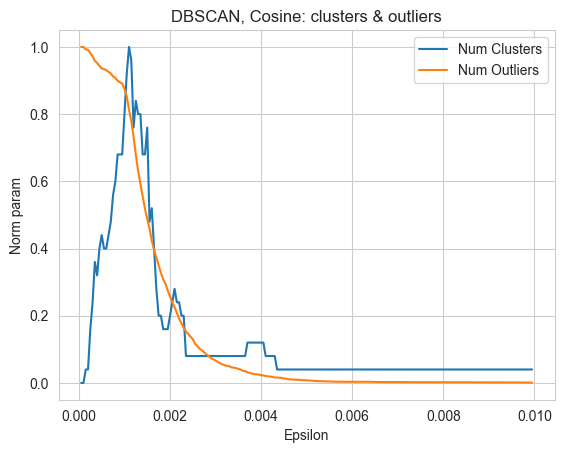

In [98]:
draw_metrics_many_norm(
    epsilons,
    {
        "Num Clusters": dbscan_num_clusters,
        "Num Outliers": dbscan_num_noises,
    },
    xlabel="Epsilon",
    ylabel="Norm param",
    title="DBSCAN, Cosine: clusters & outliers",
    normalize=True,
)

In [99]:
silhouette_scores = [silhouette_score(data_embed, dbscan_model_.labels_)
                     if len(set(dbscan_model_.labels_)) > 1 else 0 for dbscan_model_ in dbscan_fits]
davies_bouldin_indexes = [davies_bouldin_score(data_embed, dbscan_model_.labels_)
                          if len(set(dbscan_model_.labels_)) > 1 else 0 for dbscan_model_ in dbscan_fits]
calinski_harabasz_indexes = [calinski_harabasz_score(data_embed, dbscan_model_.labels_)
                             if len(set(dbscan_model_.labels_)) > 1 else 0 for dbscan_model_ in dbscan_fits]
wcss_metrics = [wcss_metric(data_embed, dbscan_model_.labels_)
                for dbscan_model_ in dbscan_fits]
accuracies = [calculate_clustering_accuracy(np.array(class_RI_LO), cl_md.labels_) for cl_md in dbscan_fits]

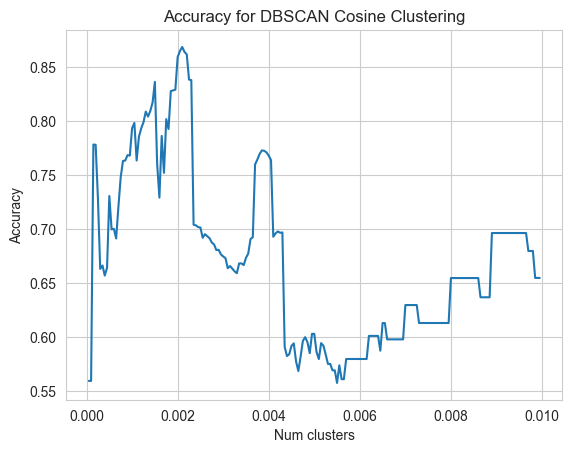

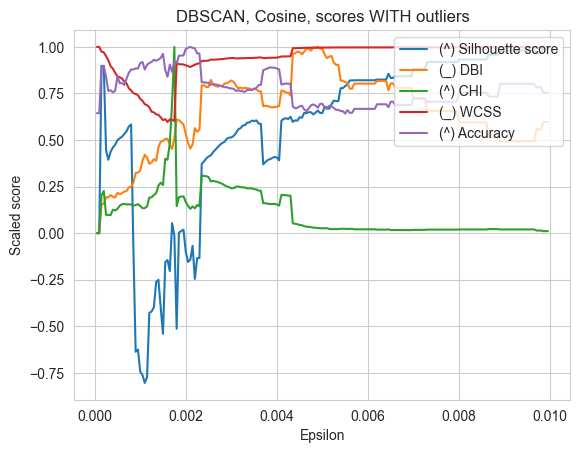

In [100]:
draw_metrics(epsilons, accuracies, title="DBSCAN Cosine Clustering", ylabel="Accuracy")

draw_metrics_many_norm(
    epsilons,
    {
        "(^) Silhouette score": silhouette_scores,
        "(_) DBI": davies_bouldin_indexes,
        "(^) CHI": calinski_harabasz_indexes,
        "(_) WCSS": wcss_metrics,
        "(^) Accuracy": accuracies,
    },
    xlabel="Epsilon",
    ylabel="Scaled score",
    title="DBSCAN, Cosine, scores WITH outliers",
)

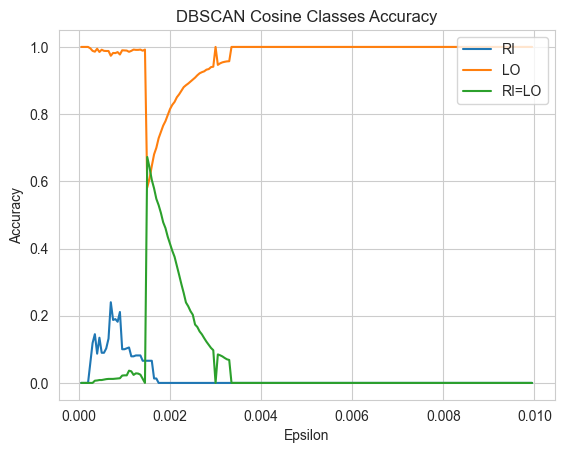

In [101]:
class_acc = {"RI": [], "LO": [], "RI=LO": []}
for cl_md in dbscan_fits:
    ca = calculate_clustering_accuracy_per_class(np.array(class_RI_LO), cl_md.labels_)
    class_acc["RI"].append(ca["RI < LO"])
    class_acc["LO"].append(ca["LO < RI"])
    class_acc["RI=LO"].append(ca["RI = LO"])

draw_metrics_many_norm(
    epsilons,
    {
        "RI": class_acc["RI"],
        "LO": class_acc["LO"],
        "RI=LO": class_acc["RI=LO"],
    },
    xlabel="Epsilon",
    ylabel="Accuracy",
    title="DBSCAN Cosine Classes Accuracy",
    normalize=False,
)

# Agglomerative Clustering, Euclidean

In [102]:
cl_metric = "euclidean"
# linkage: "ward", "complete", "average", "single"
cl_linkage = "complete"

agg_fits = []
agg_num_clusters = list(range(2, 30))

for cl_num in tqdm(agg_num_clusters):
    agg_model = AgglomerativeClustering(
        n_clusters=cl_num,
        metric=cl_metric,
        linkage=cl_linkage,
    ).fit(data_embed)
    agg_fits.append(agg_model)

silhouette_scores = [silhouette_score(data_embed, agg_model_.labels_)
                     if len(set(agg_model_.labels_)) > 1 else 0 for agg_model_ in tqdm(agg_fits)]
davies_bouldin_indexes = [davies_bouldin_score(data_embed, agg_model_.labels_)
                          if len(set(agg_model_.labels_)) > 1 else 0 for agg_model_ in tqdm(agg_fits)]
calinski_harabasz_indexes = [calinski_harabasz_score(data_embed, agg_model_.labels_)
                             if len(set(agg_model_.labels_)) > 1 else 0 for agg_model_ in tqdm(agg_fits)]
wcss_metrics = [wcss_metric(data_embed, agg_model_.labels_)
                for agg_model_ in tqdm(agg_fits)]
accuracies = [calculate_clustering_accuracy(np.array(class_RI_LO), cl_md.labels_) for cl_md in  tqdm(agg_fits)]

100%|██████████| 28/28 [00:00<00:00, 273.13it/s]


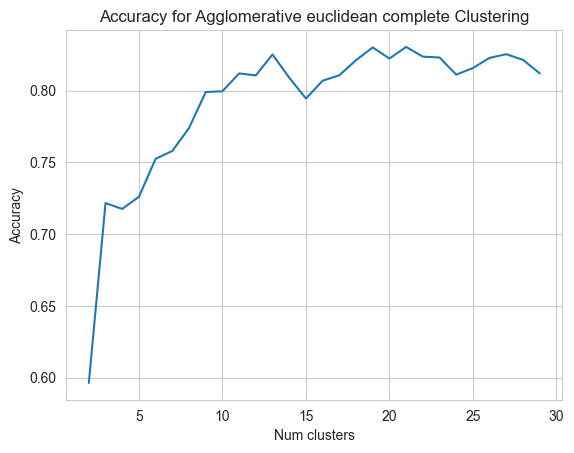

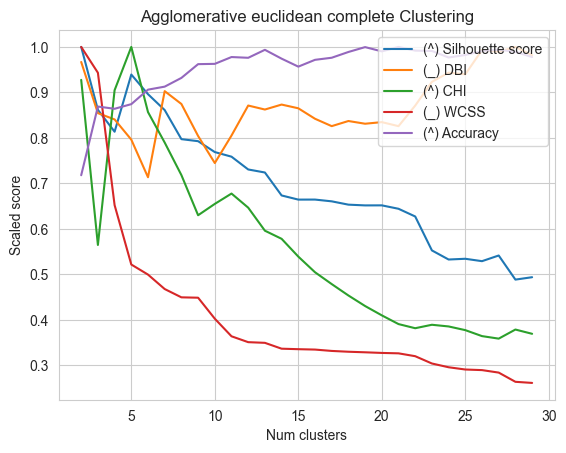

In [103]:
draw_metrics(agg_num_clusters, accuracies, title=f"Agglomerative {cl_metric} {cl_linkage} Clustering", ylabel="Accuracy")

draw_metrics_many_norm(
    agg_num_clusters,
    {
        "(^) Silhouette score": silhouette_scores,
        "(_) DBI": davies_bouldin_indexes,
        "(^) CHI": calinski_harabasz_indexes,
        "(_) WCSS": wcss_metrics,
        "(^) Accuracy": accuracies,
    },
    xlabel="Num clusters",
    ylabel="Scaled score",
    title=f"Agglomerative {cl_metric} {cl_linkage} Clustering",
)

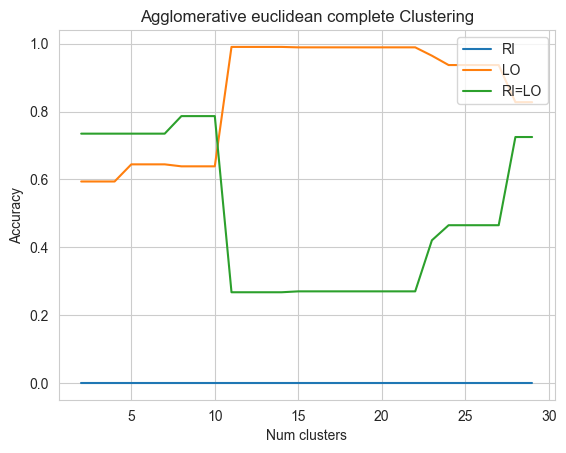

In [105]:
class_acc = {"RI": [], "LO": [], "RI=LO": []}
for cl_md in agg_fits:
    ca = calculate_clustering_accuracy_per_class(np.array(class_RI_LO), cl_md.labels_)
    class_acc["RI"].append(ca["RI < LO"])
    class_acc["LO"].append(ca["LO < RI"])
    class_acc["RI=LO"].append(ca["RI = LO"])

draw_metrics_many_norm(
    agg_num_clusters,
    {
        "RI": class_acc["RI"],
        "LO": class_acc["LO"],
        "RI=LO": class_acc["RI=LO"],
    },
    xlabel="Num clusters",
    ylabel="Accuracy",
    title=f"Agglomerative {cl_metric} {cl_linkage} Clustering",
    normalize=False,
)

# Agglomerative Clustering, L1

In [106]:
cl_metric = "l1"
# linkage: "ward", "complete", "average", "single"
cl_linkage = "complete"

agg_fits = []
agg_num_clusters = list(range(2, 30))

for cl_num in tqdm(agg_num_clusters):
    agg_model = AgglomerativeClustering(
        n_clusters=cl_num,
        metric=cl_metric,
        linkage=cl_linkage,
    ).fit(data_embed)
    agg_fits.append(agg_model)

silhouette_scores = [silhouette_score(data_embed, agg_model_.labels_)
                     if len(set(agg_model_.labels_)) > 1 else 0 for agg_model_ in tqdm(agg_fits)]
davies_bouldin_indexes = [davies_bouldin_score(data_embed, agg_model_.labels_)
                          if len(set(agg_model_.labels_)) > 1 else 0 for agg_model_ in tqdm(agg_fits)]
calinski_harabasz_indexes = [calinski_harabasz_score(data_embed, agg_model_.labels_)
                             if len(set(agg_model_.labels_)) > 1 else 0 for agg_model_ in tqdm(agg_fits)]
wcss_metrics = [wcss_metric(data_embed, agg_model_.labels_)
                for agg_model_ in tqdm(agg_fits)]
accuracies = [calculate_clustering_accuracy(np.array(class_RI_LO), cl_md.labels_) for cl_md in tqdm(agg_fits)]

100%|██████████| 28/28 [00:00<00:00, 336.36it/s]


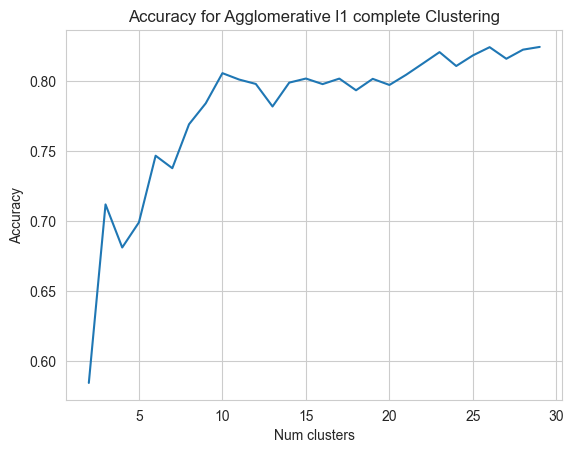

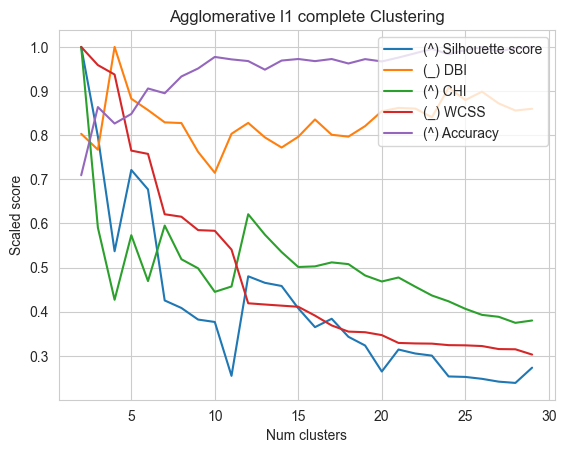

In [107]:
draw_metrics(agg_num_clusters, accuracies, title=f"Agglomerative {cl_metric} {cl_linkage} Clustering",
             ylabel="Accuracy")

draw_metrics_many_norm(
    agg_num_clusters,
    {
        "(^) Silhouette score": silhouette_scores,
        "(_) DBI": davies_bouldin_indexes,
        "(^) CHI": calinski_harabasz_indexes,
        "(_) WCSS": wcss_metrics,
        "(^) Accuracy": accuracies,
    },
    xlabel="Num clusters",
    ylabel="Scaled score",
    title=f"Agglomerative {cl_metric} {cl_linkage} Clustering",
)

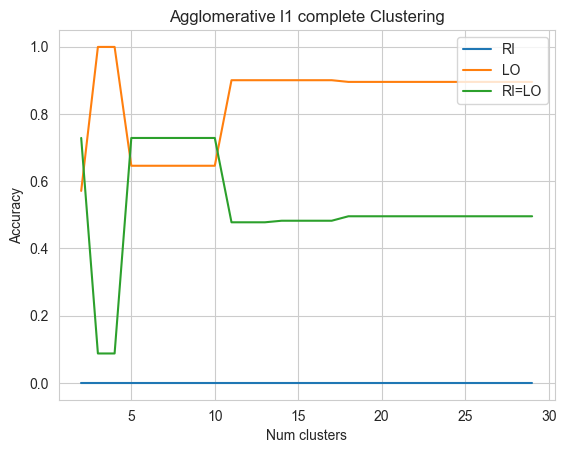

In [108]:
class_acc = {"RI": [], "LO": [], "RI=LO": []}
for cl_md in agg_fits:
    ca = calculate_clustering_accuracy_per_class(np.array(class_RI_LO), cl_md.labels_)
    class_acc["RI"].append(ca["RI < LO"])
    class_acc["LO"].append(ca["LO < RI"])
    class_acc["RI=LO"].append(ca["RI = LO"])

draw_metrics_many_norm(
    agg_num_clusters,
    {
        "RI": class_acc["RI"],
        "LO": class_acc["LO"],
        "RI=LO": class_acc["RI=LO"],
    },
    xlabel="Num clusters",
    ylabel="Accuracy",
    title=f"Agglomerative {cl_metric} {cl_linkage} Clustering",
    normalize=False,
)

# Agglomerative Clustering, L2

In [109]:
cl_metric = "l2"
# linkage: "ward", "complete", "average", "single"
cl_linkage = "complete"

agg_fits = []
agg_num_clusters = list(range(2, 30))

for cl_num in tqdm(agg_num_clusters):
    agg_model = AgglomerativeClustering(
        n_clusters=cl_num,
        metric=cl_metric,
        linkage=cl_linkage,
    ).fit(data_embed)
    agg_fits.append(agg_model)

silhouette_scores = [silhouette_score(data_embed, agg_model_.labels_)
                     if len(set(agg_model_.labels_)) > 1 else 0 for agg_model_ in tqdm(agg_fits)]
davies_bouldin_indexes = [davies_bouldin_score(data_embed, agg_model_.labels_)
                          if len(set(agg_model_.labels_)) > 1 else 0 for agg_model_ in tqdm(agg_fits)]
calinski_harabasz_indexes = [calinski_harabasz_score(data_embed, agg_model_.labels_)
                             if len(set(agg_model_.labels_)) > 1 else 0 for agg_model_ in tqdm(agg_fits)]
wcss_metrics = [wcss_metric(data_embed, agg_model_.labels_)
                for agg_model_ in tqdm(agg_fits)]
accuracies = [calculate_clustering_accuracy(np.array(class_RI_LO), cl_md.labels_) for cl_md in tqdm(agg_fits)]

100%|██████████| 28/28 [00:00<00:00, 354.52it/s]


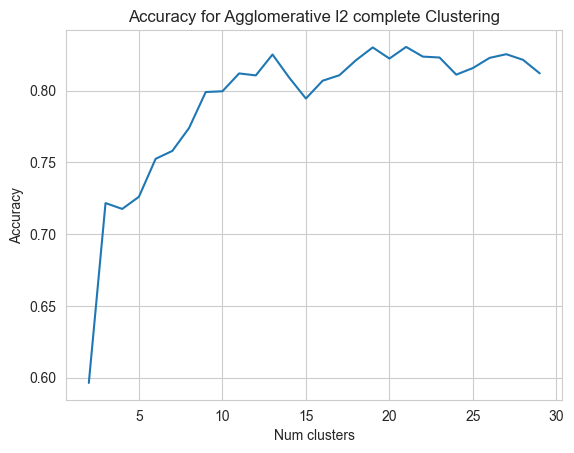

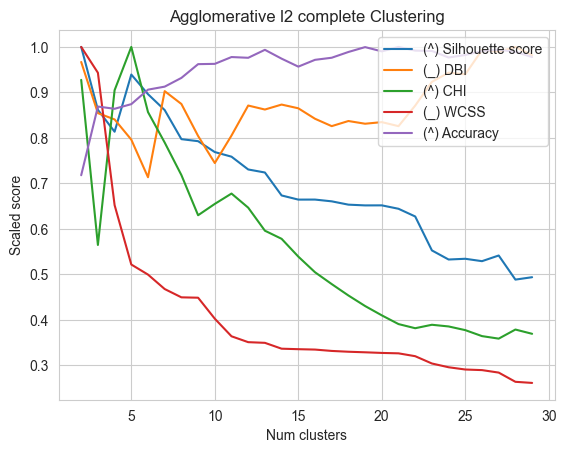

In [110]:
draw_metrics(agg_num_clusters, accuracies, title=f"Agglomerative {cl_metric} {cl_linkage} Clustering",
             ylabel="Accuracy")

draw_metrics_many_norm(
    agg_num_clusters,
    {
        "(^) Silhouette score": silhouette_scores,
        "(_) DBI": davies_bouldin_indexes,
        "(^) CHI": calinski_harabasz_indexes,
        "(_) WCSS": wcss_metrics,
        "(^) Accuracy": accuracies,
    },
    xlabel="Num clusters",
    ylabel="Scaled score",
    title=f"Agglomerative {cl_metric} {cl_linkage} Clustering",
)

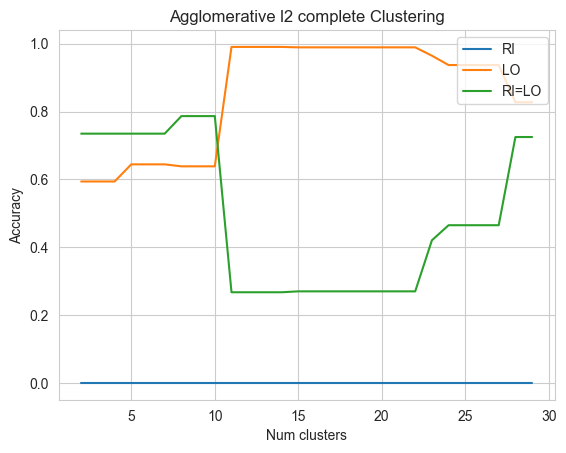

In [111]:
class_acc = {"RI": [], "LO": [], "RI=LO": []}
for cl_md in agg_fits:
    ca = calculate_clustering_accuracy_per_class(np.array(class_RI_LO), cl_md.labels_)
    class_acc["RI"].append(ca["RI < LO"])
    class_acc["LO"].append(ca["LO < RI"])
    class_acc["RI=LO"].append(ca["RI = LO"])

draw_metrics_many_norm(
    agg_num_clusters,
    {
        "RI": class_acc["RI"],
        "LO": class_acc["LO"],
        "RI=LO": class_acc["RI=LO"],
    },
    xlabel="Num clusters",
    ylabel="Accuracy",
    title=f"Agglomerative {cl_metric} {cl_linkage} Clustering",
    normalize=False,
)

# Agglomerative Clustering, Cosine

In [114]:
cl_metric = "cosine"
# linkage: "ward", "complete", "average", "single"
cl_linkage = "complete"

agg_fits = []
agg_num_clusters = list(range(2, 30))

for cl_num in tqdm(agg_num_clusters):
    agg_model = AgglomerativeClustering(
        n_clusters=cl_num,
        metric=cl_metric,
        linkage=cl_linkage,
    ).fit(data_embed)
    agg_fits.append(agg_model)

silhouette_scores = [silhouette_score(data_embed, agg_model_.labels_)
                     if len(set(agg_model_.labels_)) > 1 else 0 for agg_model_ in tqdm(agg_fits)]
davies_bouldin_indexes = [davies_bouldin_score(data_embed, agg_model_.labels_)
                          if len(set(agg_model_.labels_)) > 1 else 0 for agg_model_ in tqdm(agg_fits)]
calinski_harabasz_indexes = [calinski_harabasz_score(data_embed, agg_model_.labels_)
                             if len(set(agg_model_.labels_)) > 1 else 0 for agg_model_ in tqdm(agg_fits)]
wcss_metrics = [wcss_metric(data_embed, agg_model_.labels_)
                for agg_model_ in tqdm(agg_fits)]
accuracies = [calculate_clustering_accuracy(np.array(class_RI_LO), cl_md.labels_) for cl_md in tqdm(agg_fits)]

100%|██████████| 28/28 [00:00<00:00, 368.43it/s]


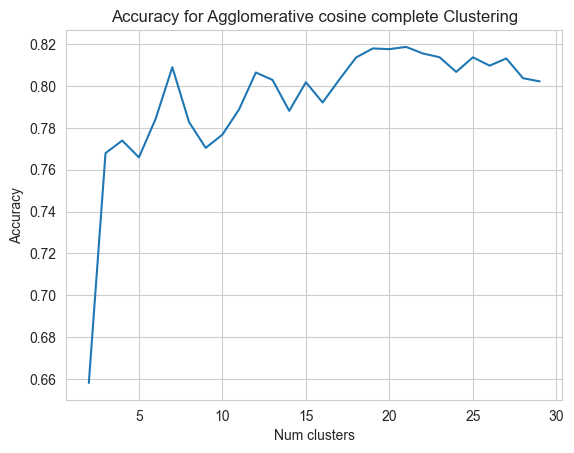

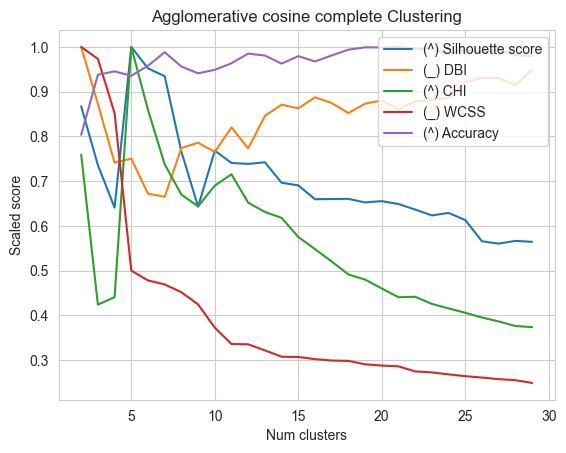

In [115]:
draw_metrics(agg_num_clusters, accuracies, title=f"Agglomerative {cl_metric} {cl_linkage} Clustering",
             ylabel="Accuracy")

draw_metrics_many_norm(
    agg_num_clusters,
    {
        "(^) Silhouette score": silhouette_scores,
        "(_) DBI": davies_bouldin_indexes,
        "(^) CHI": calinski_harabasz_indexes,
        "(_) WCSS": wcss_metrics,
        "(^) Accuracy": accuracies,
    },
    xlabel="Num clusters",
    ylabel="Scaled score",
    title=f"Agglomerative {cl_metric} {cl_linkage} Clustering",
)

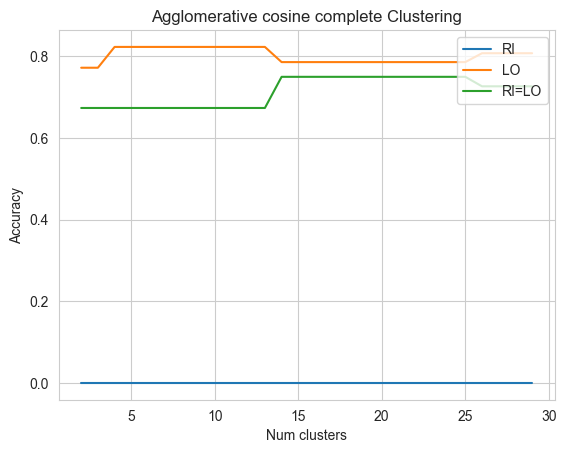

In [116]:
class_acc = {"RI": [], "LO": [], "RI=LO": []}
for cl_md in agg_fits:
    ca = calculate_clustering_accuracy_per_class(np.array(class_RI_LO), cl_md.labels_)
    class_acc["RI"].append(ca["RI < LO"])
    class_acc["LO"].append(ca["LO < RI"])
    class_acc["RI=LO"].append(ca["RI = LO"])

draw_metrics_many_norm(
    agg_num_clusters,
    {
        "RI": class_acc["RI"],
        "LO": class_acc["LO"],
        "RI=LO": class_acc["RI=LO"],
    },
    xlabel="Num clusters",
    ylabel="Accuracy",
    title=f"Agglomerative {cl_metric} {cl_linkage} Clustering",
    normalize=False,
)